In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta='selected_dataset.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',')
df.shape

(569, 10)

# PARTE I- EDA

## 1. Descripción del Conjunto de Datos
* Breve descripción de cada conjunto de datos, incluyendo la fuente, el tamaño y las variables.

* Fuente: Este conjunto de datos contiene información sobre varias series de Webtoons.
* id: Identificador único para cada Webtoon.
* Name: Nombre de la serie de Webtoon.
* Writer: Nombre del escritor de la serie.
* Likes: Número de "Me gusta" que ha recibido la serie, en formato de millones.
* Genre: Género principal de la serie (por ejemplo, Romance).
* Rating: Calificación de la serie, generalmente en una escala de 10.
* Subscribers: Número de suscriptores a la serie, en millones.
* Summary: Resumen corto de la trama de la serie.
* Update: Frecuencia con la que se actualiza el Webtoon (por ejemplo, "UP EVERY WEDNESDAY").
* Reading Link: Enlace para leer la serie en línea..

*Tamaño del Conjunto de Datos: Número de Filas: 569 - Número de Columnas: 10

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            569 non-null    int64  
 1   Name          569 non-null    object 
 2   Writer        568 non-null    object 
 3   Likes         569 non-null    object 
 4   Genre         569 non-null    object 
 5   Rating        569 non-null    float64
 6   Subscribers   569 non-null    object 
 7   Summary       569 non-null    object 
 8   Update        569 non-null    object 
 9   Reading Link  569 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 44.6+ KB


## 2. Análisis Estadístico Descriptivo
* Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.
* Analizar la distribución de las variables categóricas.

In [4]:
df.describe()

,id,Rating
count,569.000000,569.000000
mean,284.000000,9.418998
std,164.400426,0.557571
min,0.000000,5.410000
25%,142.000000,9.310000
50%,284.000000,9.580000
75%,426.000000,9.730000
max,568.000000,9.930000


In [5]:
# Analizar la distribución de la columna 'Genre'
genre_distribution = df['Genre'].value_counts()

# Mostrar la distribución
print(genre_distribution)



Genre
Fantasy          95
Romance          90
Drama            60
Comedy           52
Slice of life    49
Action           47
Thriller         35
Supernatural     33
Sci-fi           32
Superhero        26
Horror           20
Sports           10
Mystery           9
Informative       5
Historical        4
Heartwarming      2
Name: count, dtype: int64


In [6]:
# Analizar la distribución de la columna 'Writer'
writer_distribution = df['Writer'].value_counts()

# Mostrar las 10 primeras entradas
print(writer_distribution.head(10))


Writer
Various Artists    10
Ilkwon Ha           4
Dean Haspiel        4
Donggeon Lee        4
Cho Seok            3
Bae Jin-Soo         3
JH                  3
Seokwoo             3
Snailords           3
UMKY / SEHON        2
Name: count, dtype: int64


## 3. Visualizaciones:
* Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).
* Visualizar las correlaciones entre variables (mapa de calor de correlación).

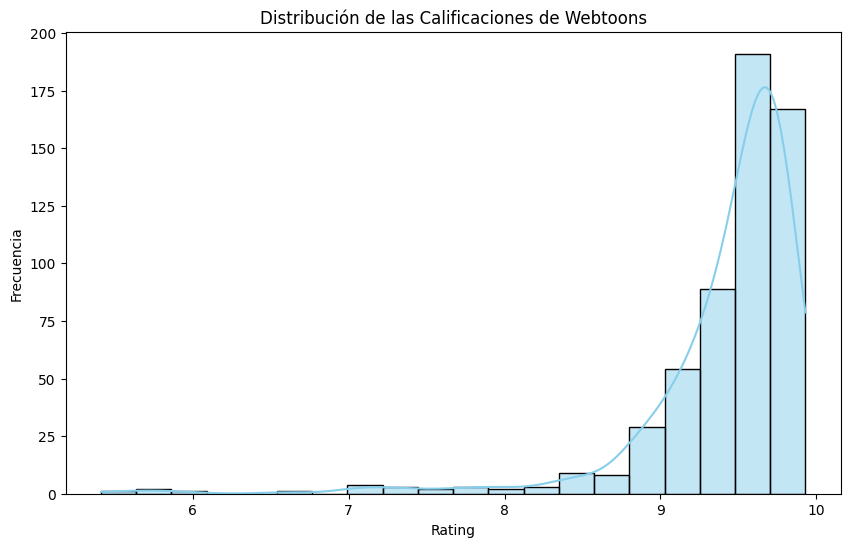

In [7]:
# Visualización: Histograma de las calificaciones ('Rating')
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de las Calificaciones de Webtoons')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()


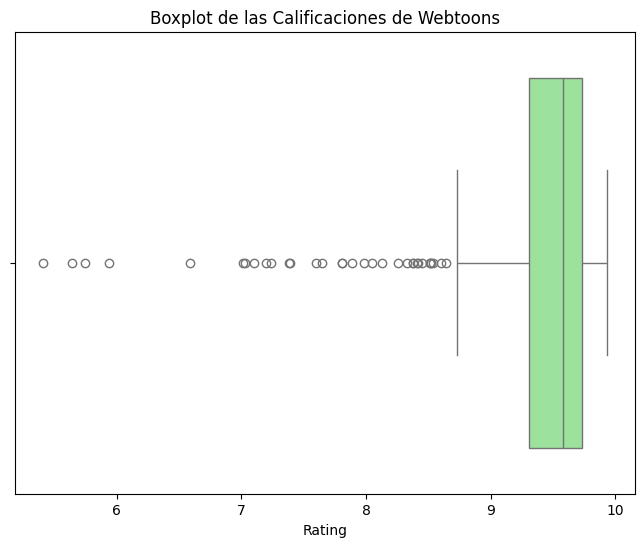

In [8]:
# Visualización: Boxplot para la columna 'Rating'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rating'], color='lightgreen')
plt.title('Boxplot de las Calificaciones de Webtoons')
plt.xlabel('Rating')
plt.show()


/tmp/ipykernel_6448/834517263.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Genre', y='Rating', palette='Set2')


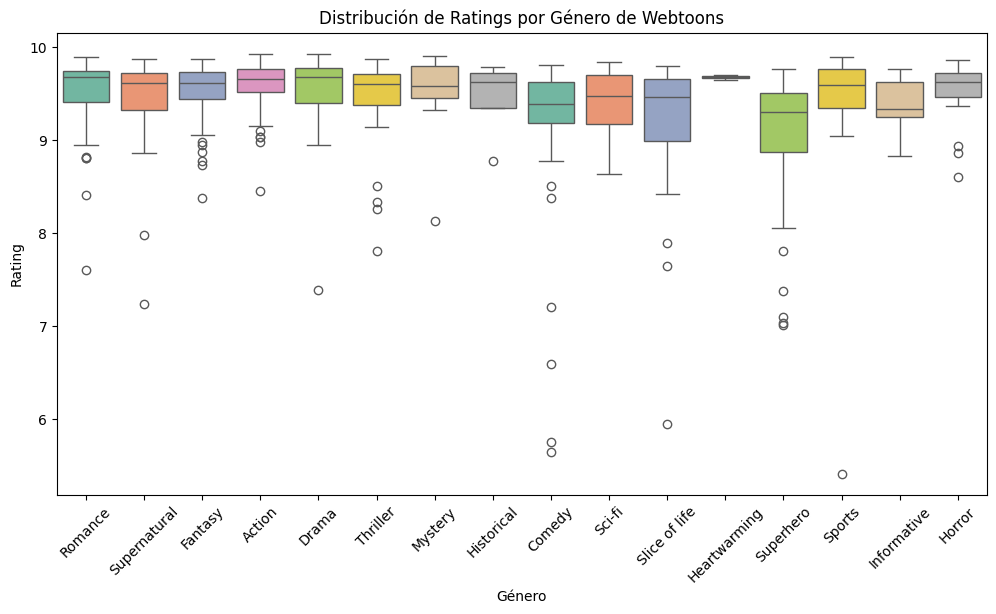

In [9]:
# Visualización: Boxplot de 'Rating' por 'Genre'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Genre', y='Rating', palette='Set2')
plt.title('Distribución de Ratings por Género de Webtoons')
plt.xlabel('Género')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


## 4. Identificación de Valores Nulos y Outliers
* Detectar valores nulos y discutir cómo podrían ser tratados.
* Identificar outliers y evaluar su impacto potencial en el análisis

In [10]:
df.isnull().sum()

id              0
Name            0
Writer          1
Likes           0
Genre           0
Rating          0
Subscribers     0
Summary         0
Update          0
Reading Link    0
dtype: int64

In [11]:
# eliminamos las filas que contengan valores nulos en todas las columnas
df_cleaned = df.dropna(how='all')
df_cleaned.shape

(569, 10)

In [12]:
df_cleaned.isnull().sum()

id              0
Name            0
Writer          1
Likes           0
Genre           0
Rating          0
Subscribers     0
Summary         0
Update          0
Reading Link    0
dtype: int64

In [13]:
df = df.fillna('Desconocido')

In [14]:
df_cleaned.isnull().sum()

id              0
Name            0
Writer          1
Likes           0
Genre           0
Rating          0
Subscribers     0
Summary         0
Update          0
Reading Link    0
dtype: int64

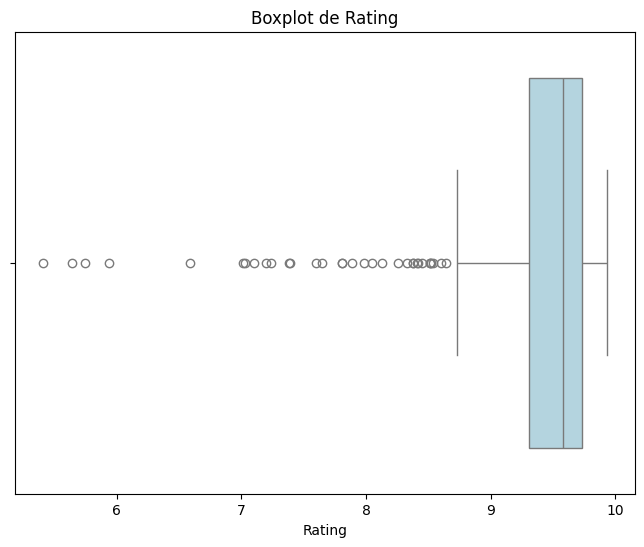

In [15]:
# Boxplot para la columna 'Rating'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Rating'], color='lightblue')
plt.title('Boxplot de Rating')
plt.xlabel('Rating')
plt.show()


In [16]:
# Calcular el IQR (Rango Intercuartílico) para 'Rating'
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites superior e inferior para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = df[(df['Rating'] < lower_bound) | (df['Rating'] > upper_bound)]

# Mostrar los outliers
print("Outliers identificados:")
print(outliers[['Rating']])


Outliers identificados:
     Rating
56     8.51
89     8.41
137    7.81
145    7.98
159    7.39
173    8.38
208    8.45
235    7.60
316    8.64
317    7.24
366    8.42
380    5.94
384    8.51
389    8.54
392    7.20
394    5.41
395    8.52
397    8.38
399    6.59
400    5.75
404    5.64
405    7.38
435    8.05
437    7.10
438    7.03
444    7.01
461    7.89
462    7.65
512    7.81
531    8.33
544    8.60
552    8.26
557    8.13


In [17]:
# Calcular la media y desviación estándar de 'Rating'
mean_rating = df['Rating'].mean()
std_rating = df['Rating'].std()

# Definir los límites para outliers
lower_bound = mean_rating - 3 * std_rating
upper_bound = mean_rating + 3 * std_rating

# Identificar outliers
outliers = df[(df['Rating'] < lower_bound) | (df['Rating'] > upper_bound)]

# Mostrar los outliers
print("Outliers identificados con Desviación Estándar:")
print(outliers[['Rating']])


Outliers identificados con Desviación Estándar:
     Rating
159    7.39
235    7.60
317    7.24
380    5.94
392    7.20
394    5.41
399    6.59
400    5.75
404    5.64
405    7.38
437    7.10
438    7.03
444    7.01
462    7.65


In [18]:
# Eliminar outliers de la columna 'Rating'
df_clean = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]
